In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
df = pd.read_csv("C:/Users/Lenovo/Downloads/house_price.csv")


In [ ]:
# question 1,  performing basic EDA(exploratory data analysis)

In [9]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [15]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


None

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [19]:
summary_stats=df.describe()
display(summary_stats)

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


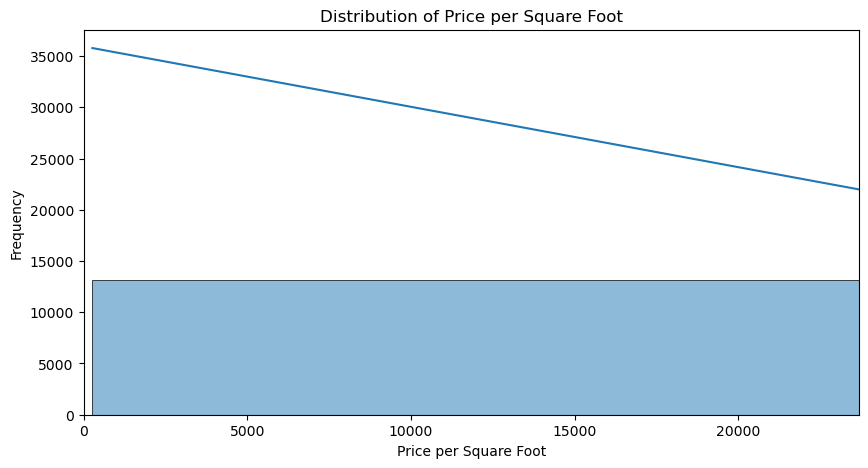

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(df["price_per_sqft"], bins=100, kde=True)
plt.xlim(0, df["price_per_sqft"].quantile(0.99))  # Exclude extreme outliers for better visualization
plt.xlabel("Price per Square Foot")
plt.ylabel("Frequency")
plt.title("Distribution of Price per Square Foot")
plt.show()

In [23]:
outlier_threshold = df["price_per_sqft"].quantile(0.99)
outliers = df[df["price_per_sqft"] > outlier_threshold]
display(outliers.head())


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719


In [ ]:
# 2

In [25]:
Q1 = df["price_per_sqft"].quantile(0.25)
Q3 = df["price_per_sqft"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [27]:
outliers_iqr = df[(df["price_per_sqft"] < lower_bound) | (df["price_per_sqft"] > upper_bound)]
display(outliers_iqr.head())

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250


In [35]:
# Identify extreme outliers using Z-score method
z_scores = (df["price_per_sqft"] - df["price_per_sqft"].mean()) / df["price_per_sqft"].std()
outliers_z = df[np.abs(z_scores) > 3]
display(outliers_z.head())

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [47]:
#  Trimming (removing outliers)
df_trimmed = df[(df["price_per_sqft"] >= lower_bound) & (df["price_per_sqft"] <= upper_bound)]
display(df_trimmed.head())

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [49]:
#  Capping (replacing outliers with boundaries)
df_capped = df.copy()
df_capped.loc[df_capped["price_per_sqft"] > upper_bound, "price_per_sqft"] = upper_bound
df_capped.loc[df_capped["price_per_sqft"] < lower_bound, "price_per_sqft"] = lower_bound
display(df_capped.head())

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [53]:
#  Imputation using Median
df_imputed = df.copy()
median_value = df["price_per_sqft"].median()
df_imputed.loc[(df_imputed["price_per_sqft"] > upper_bound) | (df_imputed["price_per_sqft"] < lower_bound), "price_per_sqft"] = median_value
display(df_imputed.head())

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
# 3, Box plots to visualize outlier removal methods

Text(0.5, 1.0, 'Original Data')

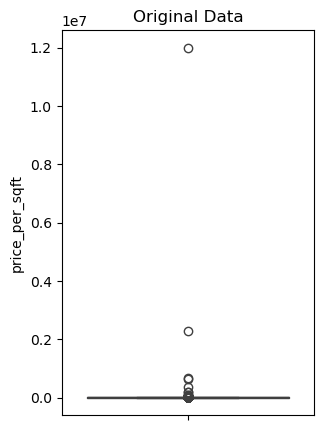

In [55]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
sns.boxplot(y=df["price_per_sqft"])
plt.title("Original Data")

Text(0.5, 1.0, 'Trimmed Data')

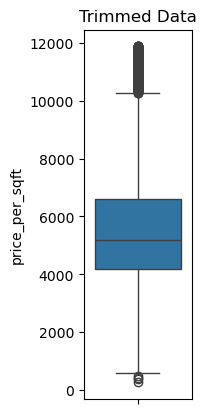

In [57]:
plt.subplot(1, 4, 2)
sns.boxplot(y=df_trimmed["price_per_sqft"])
plt.title("Trimmed Data")


Text(0.5, 1.0, 'Capped Data')

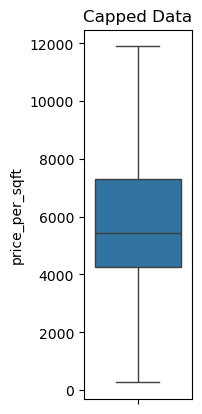

In [59]:
plt.subplot(1, 4, 3)
sns.boxplot(y=df_capped["price_per_sqft"])
plt.title("Capped Data")


Text(0.5, 1.0, 'Imputed Data')

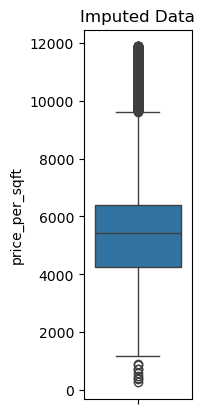

In [61]:
plt.subplot(1, 4, 4)
sns.boxplot(y=df_imputed["price_per_sqft"])
plt.title("Imputed Data")

In [67]:
plt.tight_layout()
plt.show()
display(df_trimmed.head())
display(df_capped.head())
display(df_imputed.head())



<Figure size 640x480 with 0 Axes>

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [ ]:
#4

In [71]:
from scipy.stats import skew, kurtosis

In [73]:
# Check skewness and kurtosis before transformation
original_skewness = skew(df["price_per_sqft"])
original_kurtosis = kurtosis(df["price_per_sqft"])
print(f"Original Skewness: {original_skewness}")
print(f"Original Kurtosis: {original_kurtosis}")


Original Skewness: 108.26875024325159
Original Kurtosis: 12090.633538860382


In [75]:
# Apply log transformation to normalize data
df["price_per_sqft_log"] = np.log1p(df["price_per_sqft"])


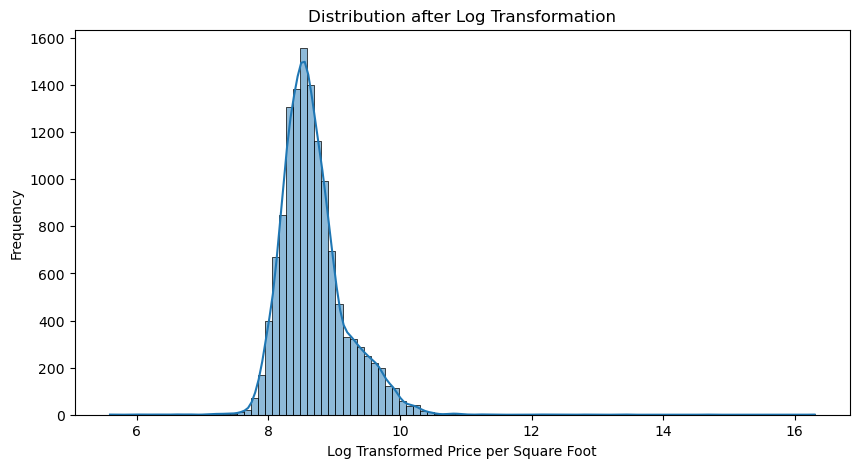

In [77]:
# Plot transformed data
plt.figure(figsize=(10, 5))
sns.histplot(df["price_per_sqft_log"], bins=100, kde=True)
plt.xlabel("Log Transformed Price per Square Foot")
plt.ylabel("Frequency")
plt.title("Distribution after Log Transformation")
plt.show()


In [79]:
# Check skewness and kurtosis after transformation
transformed_skewness = skew(df["price_per_sqft_log"])
transformed_kurtosis = kurtosis(df["price_per_sqft_log"])
print(f"Transformed Skewness: {transformed_skewness}")
print(f"Transformed Kurtosis: {transformed_kurtosis}")

Transformed Skewness: 1.4003259019533636
Transformed Kurtosis: 9.203000543610957


In [ ]:
#5

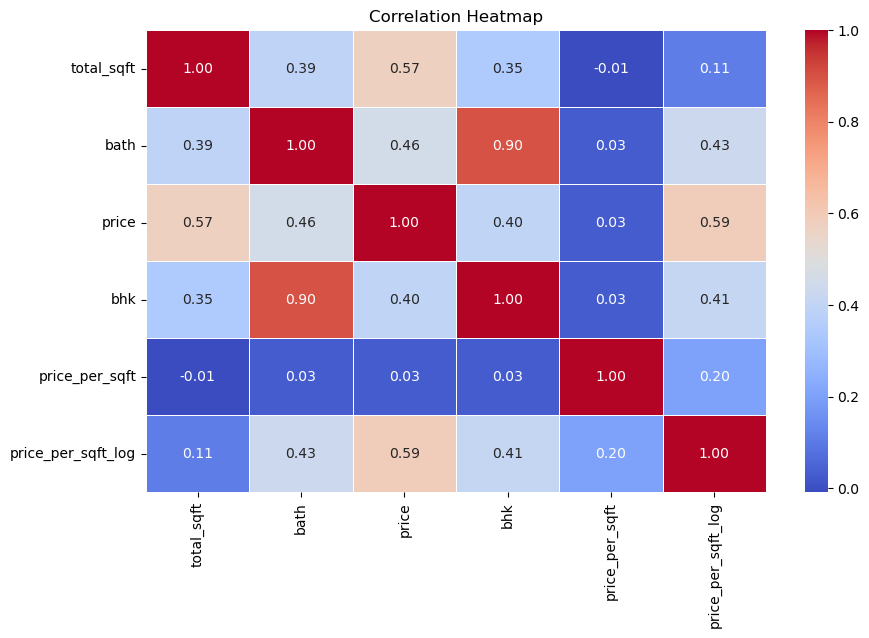

In [85]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
#6

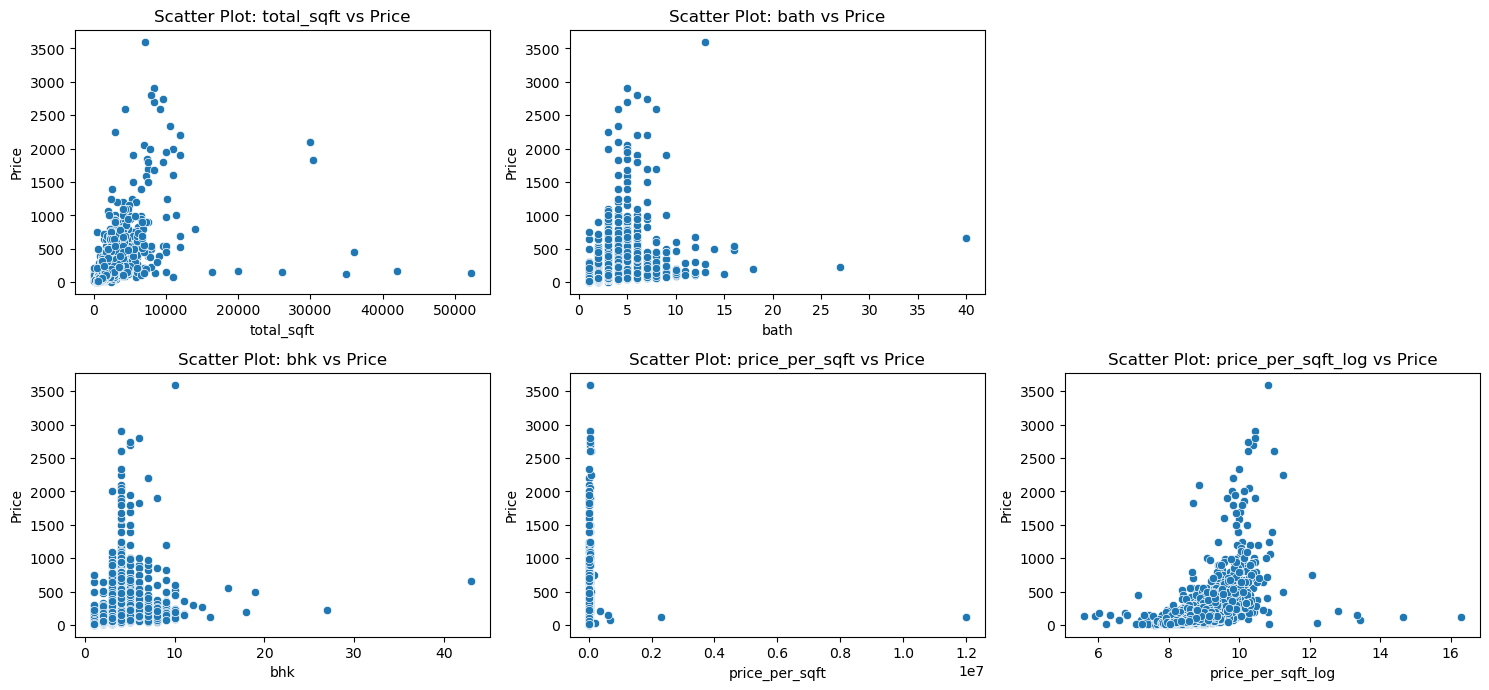

In [87]:
# Scatter plots to check correlations
plt.figure(figsize=(15, 10))
numeric_columns = numeric_df.columns
total_plots = len(numeric_columns)

for i, col in enumerate(numeric_columns):
    if col != "price":  # Avoid plotting price vs. itself
        plt.subplot(3, 3, i+1)
        sns.scatterplot(x=df[col], y=df["price"])
        plt.xlabel(col)
        plt.ylabel("Price")
        plt.title(f"Scatter Plot: {col} vs Price")

plt.tight_layout()
plt.show()